# Log Loss (Cross Entropy Loss): La Métrica Fundamental para Clasificación Probabilística

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, accuracy_score
from sklearn.calibration import calibration_curve

# Configuración general
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
np.random.seed(42)

print("=== ANÁLISIS DE LOG LOSS Y CALIBRACIÓN DE MODELOS ===\n")


=== ANÁLISIS DE LOG LOSS Y CALIBRACIÓN DE MODELOS ===



In [4]:
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    n_clusters_per_class=1,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

print(f"Tamaño entrenamiento: {X_train.shape}")
print(f"Tamaño prueba: {X_test.shape}")
print(f"Distribución de clases: {np.bincount(y_train)}")


Tamaño entrenamiento: (700, 20)
Tamaño prueba: (300, 20)
Distribución de clases: [348 352]


In [6]:
# Regresión Logística
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Modelos entrenados correctamente.")


Modelos entrenados correctamente.


In [8]:
# Probabilidades de clase positiva
lr_proba = lr_model.predict_proba(X_test)[:, 1]
rf_proba = rf_model.predict_proba(X_test)[:, 1]

# Predicciones binarias
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Cálculo de métricas
lr_logloss = log_loss(y_test, lr_proba)
rf_logloss = log_loss(y_test, rf_proba)

lr_accuracy = accuracy_score(y_test, lr_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"Regresión Logística:\n  Log Loss: {lr_logloss:.4f}\n  Accuracy: {lr_accuracy:.4f}")
print(f"\nRandom Forest:\n  Log Loss: {rf_logloss:.4f}\n  Accuracy: {rf_accuracy:.4f}")


Regresión Logística:
  Log Loss: 0.1146
  Accuracy: 0.9667

Random Forest:
  Log Loss: 0.1383
  Accuracy: 0.9667


In [10]:
example_true = np.array([1, 1, 0, 0, 1])
example_proba1 = np.array([0.9, 0.7, 0.2, 0.1, 0.8])   # Buenas probabilidades
example_proba2 = np.array([0.6, 0.51, 0.49, 0.4, 0.55]) # Conservadoras
example_proba3 = np.array([0.1, 0.3, 0.8, 0.9, 0.2])   # Incorrectas overconfident

logloss1 = log_loss(example_true, example_proba1)
logloss2 = log_loss(example_true, example_proba2)
logloss3 = log_loss(example_true, example_proba3)

print("\nComparación de estrategias de predicción:")
print(f"  Bien calibradas: Log Loss = {logloss1:.4f}")
print(f"  Conservadoras:   Log Loss = {logloss2:.4f}")
print(f"  Overconfident:   Log Loss = {logloss3:.4f}")



Comparación de estrategias de predicción:
  Bien calibradas: Log Loss = 0.2027
  Conservadoras:   Log Loss = 0.5932
  Overconfident:   Log Loss = 1.8056


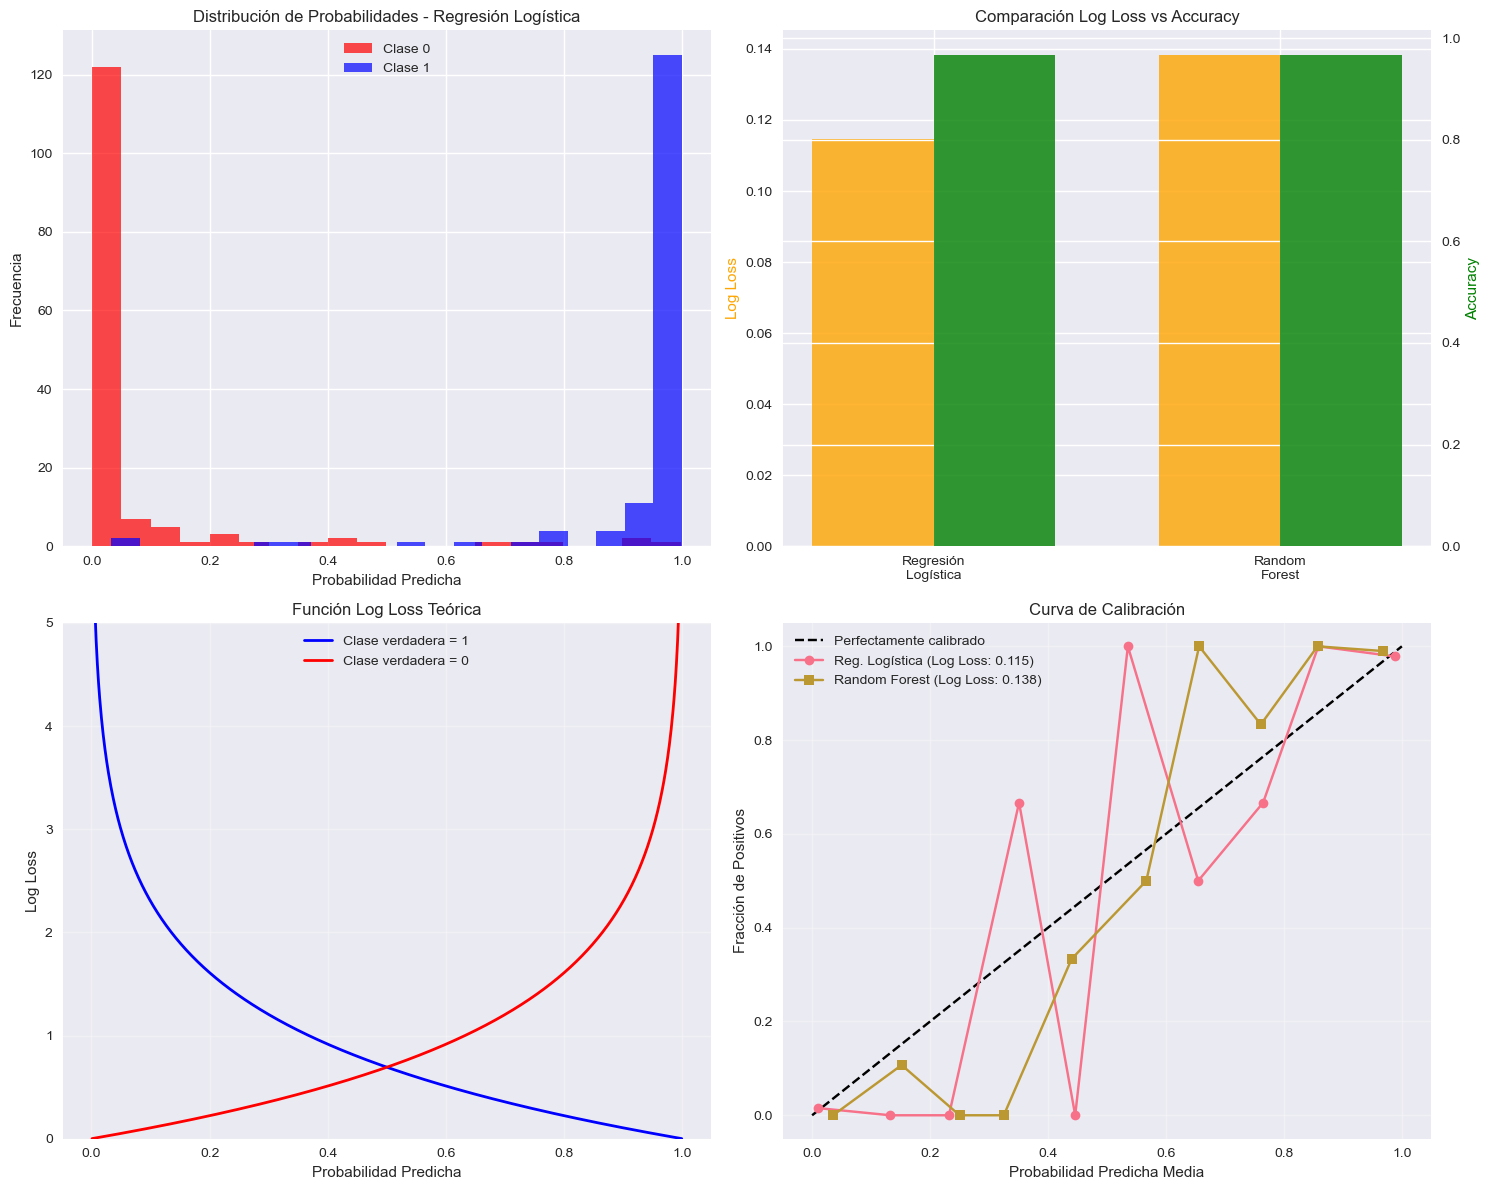

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# --- Gráfico 1: Distribución de probabilidades (Logistic Regression)
axes[0, 0].hist(lr_proba[y_test == 0], bins=20, alpha=0.7, color='red', label='Clase 0')
axes[0, 0].hist(lr_proba[y_test == 1], bins=20, alpha=0.7, color='blue', label='Clase 1')
axes[0, 0].set_xlabel('Probabilidad Predicha')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Distribución de Probabilidades - Regresión Logística')
axes[0, 0].legend()

# --- Gráfico 2: Comparación Log Loss vs Accuracy
models = ['Regresión\nLogística', 'Random\nForest']
logloss_values = [lr_logloss, rf_logloss]
accuracy_values = [lr_accuracy, rf_accuracy]

x = np.arange(len(models))
width = 0.35

axes[0, 1].bar(x - width/2, logloss_values, width, color='orange', label='Log Loss', alpha=0.8)
axes[0, 1].set_ylabel('Log Loss', color='orange')
axes[0, 1].set_title('Comparación Log Loss vs Accuracy')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(models)

ax2 = axes[0, 1].twinx()
ax2.bar(x + width/2, accuracy_values, width, color='green', label='Accuracy', alpha=0.8)
ax2.set_ylabel('Accuracy', color='green')

# --- Gráfico 3: Función Log Loss teórica
p_range = np.linspace(0.001, 0.999, 1000)
axes[1, 0].plot(p_range, -np.log(p_range), label='Clase verdadera = 1', color='blue', lw=2)
axes[1, 0].plot(p_range, -np.log(1 - p_range), label='Clase verdadera = 0', color='red', lw=2)
axes[1, 0].set_xlabel('Probabilidad Predicha')
axes[1, 0].set_ylabel('Log Loss')
axes[1, 0].set_title('Función Log Loss Teórica')
axes[1, 0].set_ylim(0, 5)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# --- Gráfico 4: Curvas de calibración
f_pos_lr, mean_pred_lr = calibration_curve(y_test, lr_proba, n_bins=10)
f_pos_rf, mean_pred_rf = calibration_curve(y_test, rf_proba, n_bins=10)

axes[1, 1].plot([0, 1], [0, 1], 'k--', label='Perfectamente calibrado')
axes[1, 1].plot(mean_pred_lr, f_pos_lr, 'o-', label=f'Reg. Logística (Log Loss: {lr_logloss:.3f})')
axes[1, 1].plot(mean_pred_rf, f_pos_rf, 's-', label=f'Random Forest (Log Loss: {rf_logloss:.3f})')
axes[1, 1].set_xlabel('Probabilidad Predicha Media')
axes[1, 1].set_ylabel('Fracción de Positivos')
axes[1, 1].set_title('Curva de Calibración')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [14]:
print("\n=== DEMOSTRACIÓN PRÁCTICA ===")
print("Ejemplo: impacto de predicciones muy confiadas pero incorrectas.\n")

confident_wrong = np.array([0.01, 0.05, 0.95, 0.99])
true_labels = np.array([1, 1, 0, 0])

losses = []
for p, true in zip(confident_wrong, true_labels):
    loss = -np.log(p) if true == 1 else -np.log(1 - p)
    losses.append(loss)
    print(f"Predicción: {p:.2f} | Verdadero: {true} | Log Loss: {loss:.3f}")

print(f"\nLog Loss promedio: {np.mean(losses):.3f}")
print("Las predicciones incorrectas con alta confianza generan penalizaciones grandes.")



=== DEMOSTRACIÓN PRÁCTICA ===
Ejemplo: impacto de predicciones muy confiadas pero incorrectas.

Predicción: 0.01 | Verdadero: 1 | Log Loss: 4.605
Predicción: 0.05 | Verdadero: 1 | Log Loss: 2.996
Predicción: 0.95 | Verdadero: 0 | Log Loss: 2.996
Predicción: 0.99 | Verdadero: 0 | Log Loss: 4.605

Log Loss promedio: 3.800
Las predicciones incorrectas con alta confianza generan penalizaciones grandes.
